<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/HW10_01_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Частина 1**

​
В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

*Завантаження та підготовка даних*

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


*згорткова мережа з Dropout з early_stopping*

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точність на тестових даних:', test_acc)

train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7734 - loss: 0.6670 - val_accuracy: 0.8748 - val_loss: 0.3512
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.8757 - loss: 0.3511 - val_accuracy: 0.8936 - val_loss: 0.3014
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.8899 - loss: 0.3080 - val_accuracy: 0.8987 - val_loss: 0.2829
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.8950 - loss: 0.2825 - val_accuracy: 0.9028 - val_loss: 0.2675
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.9035 - loss: 0.2688 - val_accuracy: 0.9036 - val_loss: 0.2751
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 51ms/step - accuracy: 0.9059 - loss: 0.2534 - val_accuracy: 0.9047 - val_loss: 0.2615
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.9145 - loss: 0.2331 - val_accuracy: 0.9107 - val_loss: 0.2490
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.9178 - loss: 0.2189 - 

*Багатошарова мережа*

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_dense = model_2.fit(train_images, train_labels, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

test_loss_dense, test_acc_dense = model_2.evaluate(test_images, test_labels)
print(f'Точність на тестових даних (Багатошарова мережа): {test_acc_dense}')

train_loss_dense, train_acc_dense = model_2.evaluate(train_images, train_labels)
print('Точність на тренувальних даних (Багатошарова мережа):', train_acc_dense)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7328 - loss: 0.7397 - val_accuracy: 0.8411 - val_loss: 0.4423
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8474 - loss: 0.4116 - val_accuracy: 0.8526 - val_loss: 0.4023
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8632 - loss: 0.3729 - val_accuracy: 0.8622 - val_loss: 0.3873
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8735 - loss: 0.3493 - val_accuracy: 0.8742 - val_loss: 0.3585
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8790 - loss: 0.3238 - val_accuracy: 0.8717 - val_loss: 0.3427
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8836 - loss: 0.3152 - val_accuracy: 0.8820 - val_loss: 0.3283
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8898 - loss: 0.3016 - val_accuracy: 0.8742 - val_loss: 0.3442
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8903 - loss: 0.3

*графіки для порівняння*

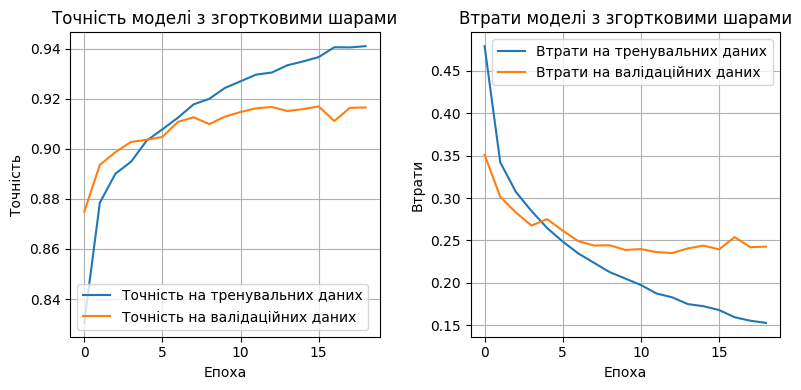

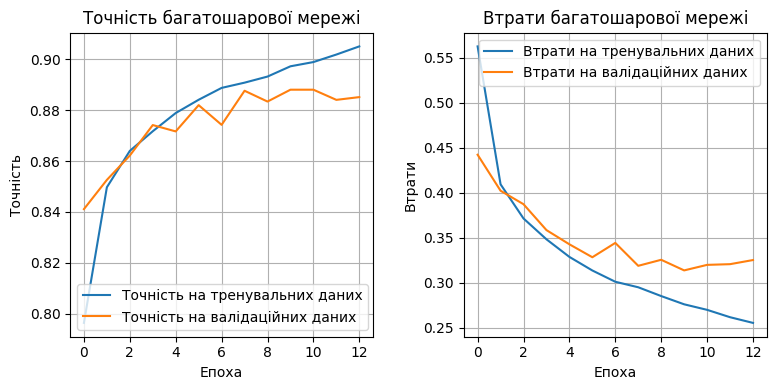

In [10]:
# Для першої мережі
plt.figure(figsize=(8, 4))

# Графік точності на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()
plt.title('Точність моделі з згортковими шарами')

# Графік втрат на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()
plt.title('Втрати моделі з згортковими шарами')

plt.tight_layout()
plt.show()

# Для другої мережі
plt.figure(figsize=(8, 4))

# Графік точності на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history_dense.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()
plt.title('Точність багатошарової мережі')

# Графік втрат на тренувальному та валідаційному наборі даних
plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history_dense.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()
plt.title('Втрати багатошарової мережі')

plt.tight_layout()
plt.show()

*результат*

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


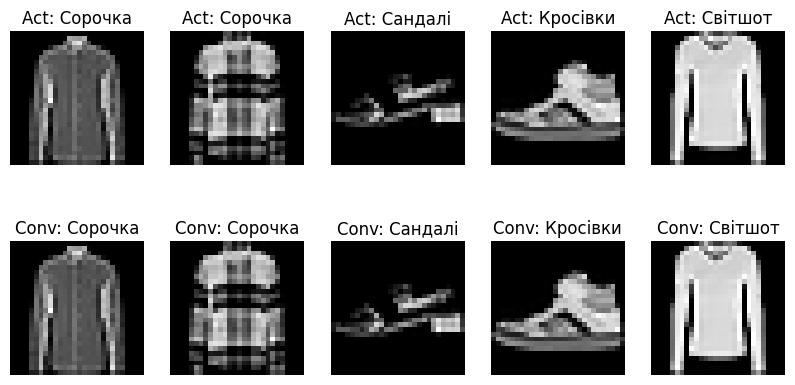

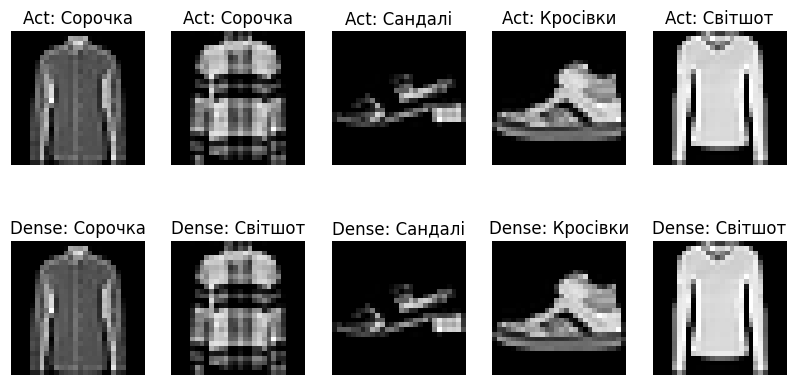

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ["Футболка/верх", "Штани", "Світшот", "Сукня", "Пальто", "Сандалі", "Сорочка", "Кросівки", "Сумка", "Чобітки"]

random_indices = np.random.choice(test_images.shape[0], size=5, replace=False)
images_to_predict = test_images[random_indices]
actual_labels = np.argmax(test_labels[random_indices], axis=1)

predictions_conv = model.predict(images_to_predict)
predicted_labels_conv = np.argmax(predictions_conv, axis=1)

predictions_dense = model_2.predict(images_to_predict)
predicted_labels_dense = np.argmax(predictions_dense, axis=1)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_to_predict[i].reshape(28, 28), cmap='gray')
    plt.title(f"Act: {class_names[actual_labels[i]]}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(images_to_predict[i].reshape(28, 28), cmap='gray')
    plt.title(f"Conv: {class_names[predicted_labels_conv[i]]}")
    plt.axis('off')

plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_to_predict[i].reshape(28, 28), cmap='gray')
    plt.title(f"Act: {class_names[actual_labels[i]]}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(images_to_predict[i].reshape(28, 28), cmap='gray')
    plt.title(f"Dense: {class_names[predicted_labels_dense[i]]}")
    plt.axis('off')

plt.show()

Висновок, в мене вийшло що згорткова мережа має кращій результат ніж багатошарова. але навчання багатошарової проходило швидше. модель згорткової яка попала в остаточний варіант ДЗ ще й не сама повільна з тих що тестувалися - з деякими налаштуваннями начання однієї епохи тривало 3-5хв.